### **Earthquake Data Overview**

####'''
This dataset provides a comprehensive look at synthetic seismic activity, crafted based on real data, in various regions worldwide.   
The data spans diverse geographic areas, offering valuable insights into regions susceptible to seismic events.
'''

'''
Objectives:
1. Continents with more frequency of earthquakes.
2. Top 5 earthquakes with the largest magnitude and the lowest one.
3. Range of magnitude
'''

#Data source: Earthquake Data Overview from Kaggle

#### Importing and Getting to know the dataset

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv ("C:\\Users\\estel\\Desktop\\Data Analysis Projects\\earthquake_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Place       1265 non-null   object 
 1    Latitude   1265 non-null   float64
 2    Longitude  1265 non-null   float64
 3    Country    1265 non-null   object 
 4    Continent  1265 non-null   object 
 5    Magnitude  1265 non-null   float64
dtypes: float64(3), object(3)
memory usage: 59.4+ KB


In [5]:
# Removing the blank spaces in front of the columns names
df.columns = df.columns.str.replace (' ','')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Place      1265 non-null   object 
 1   Latitude   1265 non-null   float64
 2   Longitude  1265 non-null   float64
 3   Country    1265 non-null   object 
 4   Continent  1265 non-null   object 
 5   Magnitude  1265 non-null   float64
dtypes: float64(3), object(3)
memory usage: 59.4+ KB


In [7]:
df.head()

,Place,Latitude,Longitude,Country,Continent,Magnitude
0,Bamako,12.6354,-8.0023,Mali,Africa,4.7
1,Niamey,13.5130,2.1151,Niger,Africa,5.7
2,Southern Chile,-39.8234,-73.0691,Chile,South America,4.9
3,Freetown,8.4815,-13.2315,Sierra Leone,Africa,4.8
4,Bamako,12.6422,-7.9990,Mali,Africa,5.3


In [8]:
df.tail()

,Place,Latitude,Longitude,Country,Continent,Magnitude
1260,Banjul,13.4498,-16.5883,Gambia,Africa,4.7
1261,Dakar,14.6920,-17.4459,Senegal,Africa,4.7
1262,Yamoussoukro,6.8198,-5.2756,Côte d'Ivoire,Africa,4.7
1263,Banjul,13.4528,-16.5874,Gambia,Africa,4.8
1264,Abidjan,5.3605,-4.0111,Côte d'Ivoire,Africa,5.8


In [9]:
df.nunique()

Place         167
Latitude     1153
Longitude    1220
Country       123
Continent       7
Magnitude      21
dtype: int64

#### **Continents with more frequency of earthquakes.**

In [14]:
df_continent = df.groupby('Continent').count()

df_continent.sort_values('Magnitude', ascending= False)

,Place,Latitude,Longitude,Country,Magnitude
Continent,,,,,
Africa,580,580,580,580,580
North America,190,190,190,190,190
Asia,155,155,155,155,155
Europe,135,135,135,135,135
South America,90,90,90,90,90
Antarctica,70,70,70,70,70
Oceania,45,45,45,45,45


In [16]:
continent_mean = df.groupby('Continent')['Magnitude'].mean()

In [18]:
import matplotlib.pyplot as plt

#### Top 5 earthquakes with the largest magnitude and the 5 lowest ones.

In [21]:
# 5 strongest earthquakes
df.sort_values('Magnitude', ascending= False).head(5)

,Place,Latitude,Longitude,Country,Continent,Magnitude
898,Tokyo,35.6882,139.6903,Japan,Asia,6.1
252,Zurich,47.3783,8.5451,Switzerland,Europe,5.9
444,Antananarivo,-18.8806,47.5113,Madagascar,Africa,5.9
168,Nouakchott,18.0745,-15.9715,Mauritania,Africa,5.8
1188,Basseterre,17.2971,-62.7373,Saint Kitts and Nevis,North America,5.8


In [22]:
# 5 lowest earthquakes
df.sort_values('Magnitude').head(5)

,Place,Latitude,Longitude,Country,Continent,Magnitude
607,Jakarta,-6.2060,106.8475,Indonesia,Asia,4.0
450,Lhasa,29.6516,91.1721,Tibet,Asia,4.1
1242,Santiago,-33.4472,-70.6659,Chile,South America,4.1
1135,Quito,-0.2295,-78.5243,Ecuador,South America,4.2
842,Port Moresby,-9.4438,147.1803,Papua New Guinea,Oceania,4.2


In [23]:
continent_mean = df.groupby('Continent')['Magnitude'].mean()

continent_mean_sorted = continent_mean.sort_values(ascending=False)
print(continent_mean_sorted)

Continent
 Antarctica       5.055714
 North America    5.042105
 Africa           5.036552
 South America    5.013333
 Asia             4.975484
 Europe           4.937778
 Oceania          4.902222
Name: Magnitude, dtype: float64


Text(0.5, 1.0, 'Mean Magnitude by Continent')

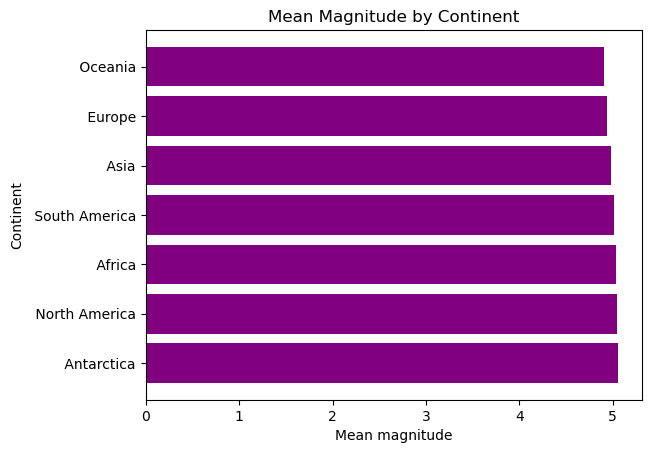

In [24]:
plt.barh(continent_mean_sorted.index, continent_mean_sorted.values, color= 'purple')

plt.xlabel('Mean magnitude')
plt.ylabel('Continent')
plt.title ('Mean Magnitude by Continent')

#### Range of magnitude

Text(0.5, 1.0, 'Histogram of Magnitude')

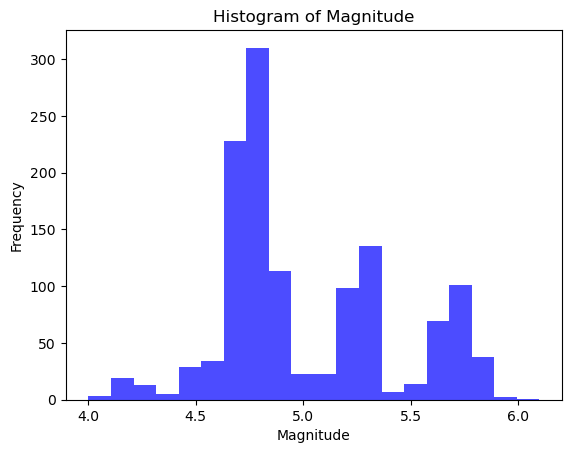

In [26]:
magnitude = df['Magnitude']

plt.hist(magnitude, bins=20, color='blue', alpha=0.7)

plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')